# Exercise 6 - Python: Support Vector Machines

## *Part I*: Support Vector Machines

**[Discuss Section Here]**

Three data sets
1. Linear Separable
2. Non-linear separable
3. Non-linear separable

---

Beginning with package imports and data loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as sio  # Used to load the Octave/MATLAB *.mat files
import nltk  # For spam classifying pre-processing
from sklearn.svm import SVC  # Trains SVM models

%matplotlib inline

sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

In [2]:
# Loading the matrices for the three data sets
data1 = sio.loadmat('ex6/ex6data1.mat')
data2 = sio.loadmat('ex6/ex6data2.mat')
data3 = sio.loadmat('ex6/ex6data3.mat')

### Linear Separable Data

Visualizing the data:

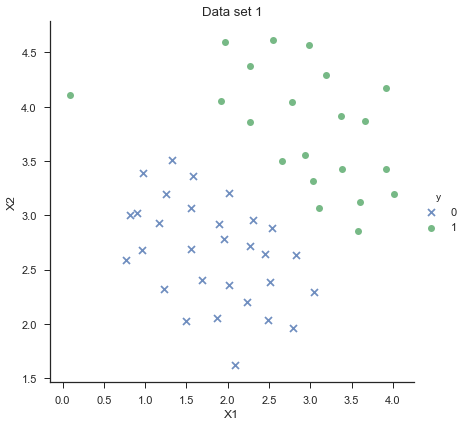

In [3]:
# Assigning X and y for the first data set
X = data1['X']
y = data1['y']

# Putting into a data frame for plots
df = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'y': y.flatten()})

# Plotting the original data
sns.lmplot(x='X1', y='X2', hue='y', markers=['x', 'o'],
           data=df, fit_reg=False, size=6)

plt.title('Data set 1')

Notice the outlier in the top left of the graph.  This will largely dictate how our values of C act.

Training the SVM at different values of C, and plotting the decision boundary and margins:

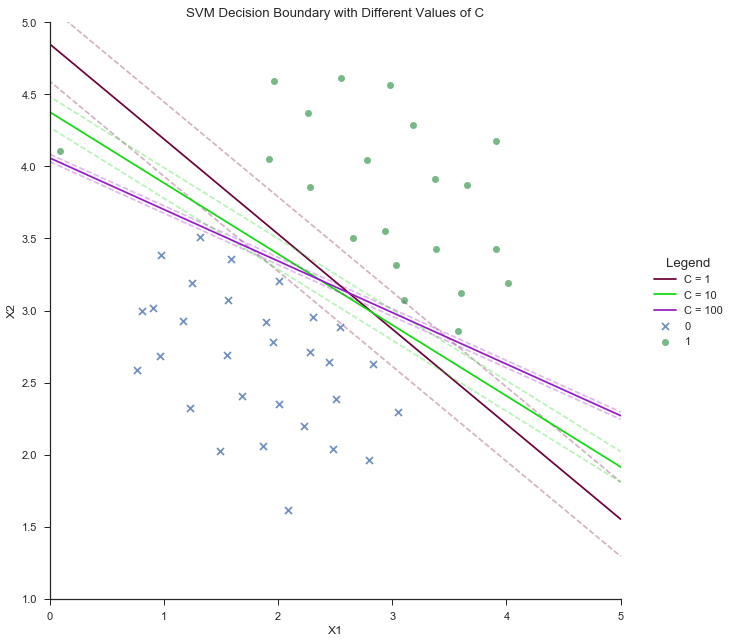

In [12]:
# Plotting the original data
fig = sns.lmplot(x='X1', y='X2', hue='y', markers=['x', 'o'],
                 data=df, fit_reg=False, size=9, legend=False)

for c in [1, 10, 100]:
    # Training the SVM
    clf = SVC(kernel='linear', C=c)
    clf.fit(X, y.ravel())
    
    # Getting the linearly separable boundary
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]
    
    # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    margin = 1 / np.sqrt(np.sum(clf.coef_**2))
    yy_down = yy + a * margin
    yy_up = yy - a * margin
    
    color = np.random.rand(3,1)
    
    # Plotting the boundary
    boundary = plt.plot(xx, yy, 'k-', c=color, label=("C = " + str(c)))
    
    # Plotting the boundary margins
    plt.plot(xx, yy_down, 'k--', alpha=0.3, c=color)
    plt.plot(xx, yy_up, 'k--', alpha=0.3, c=color)
    
# Adjusting the title and x/y axis limits
plt.title('SVM Decision Boundary with Different Values of C')
plt.xlim(0, 5)
plt.ylim(1, 5)

# Adjusting the legend location
plt.legend(bbox_to_anchor=(1.05, 0.6), loc=2,
           borderaxespad=0., title='Legend')

Notice two things about this plot:
    
1. The margins are significantly wider with lower values of C
2. C $> 100$ correctly the outlier on the upper left side of the graph, but the others misclassify it.  This is because **[insert explanation here]**

### SVM with Gaussian Kernels (Non-linear Separable Data)

Think of the Gaussian kernel as a similarity function that measures the "distance" between a pair of examples, $(x^{(i)}, x^{(j)})$

$$K_{gaussian}(x^{(i)}, x^{(j)}) = \text{exp} \Big(- \frac{\|x^{(i)} - x^{(j)\|^2}}{2\sigma^2} \Big) = \text{exp} \Bigg(- \frac{\sum_{k=1}^n (x_k^{(i)} - x_k^{(j)})^2}{2\sigma^2} \Bigg)$$

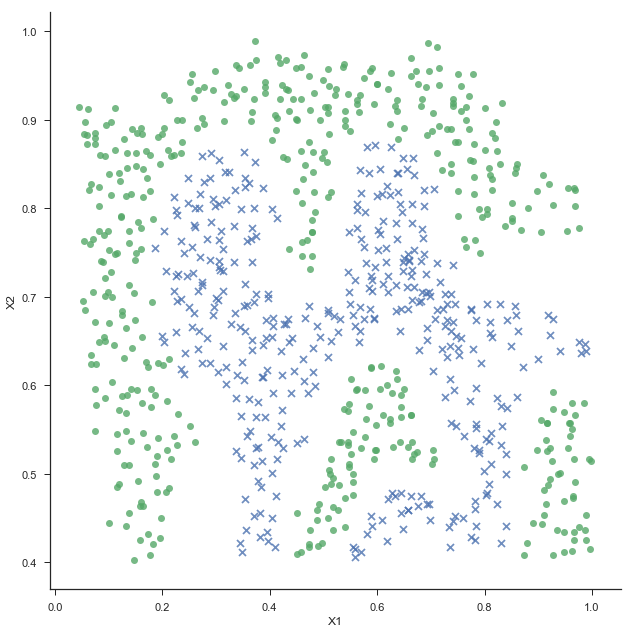

In [13]:
X = data2['X']
y = data2['y']

df = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'y': y.flatten()})

sns.lmplot(x='X1', y='X2', hue='y', markers=['x', 'o'],
                 data=df, fit_reg=False, size=9, legend=False)

In [14]:
def gaussian_kernel(x_i, x_j, sigma=1):
    """
    Similarity function to measure the 'distance' between a pair of examples
    """
    error = sum((x_i - x_j)**2)
    return np.exp(-(error) / (2*sigma**2))
    
    
test_x_i = np.array([1.0, 2.0, 1.0])
test_x_j = np.array([0.0, 4.0, -1.0])
test_sigma = 2

gaussian_kernel(test_x_i, test_x_j, test_sigma)

0.32465246735834974

[0, 1.05, 0.35, 1.05]

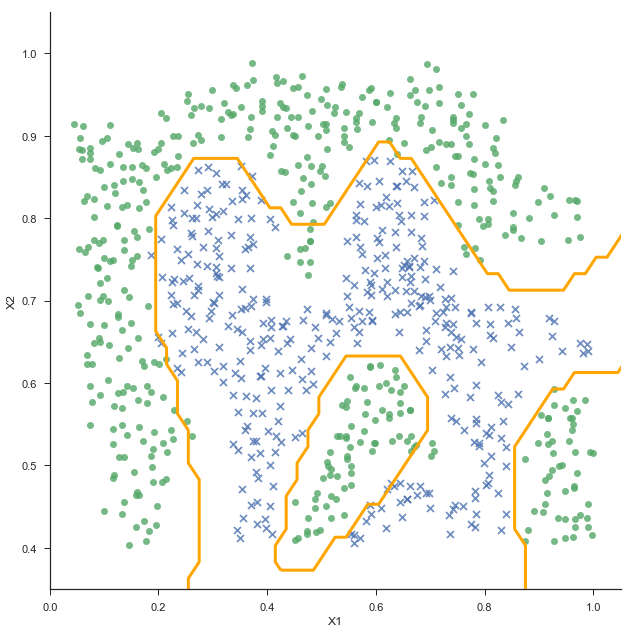

In [15]:
plt.figure()

sns.lmplot(x='X1', y='X2', hue='y', markers=['x', 'o'],
                 data=df, fit_reg=False, size=9, legend=False)



C = 100  # SVM regularization parameter
clf = SVC(kernel='rbf', C=C, gamma=10)
clf.fit(X, y.ravel())

h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='orange', alpha=1, linewidths=3, levels=[0.5])

# Adjusting the axes
plt.axis([0, 1.05, 0.35, 1.05])

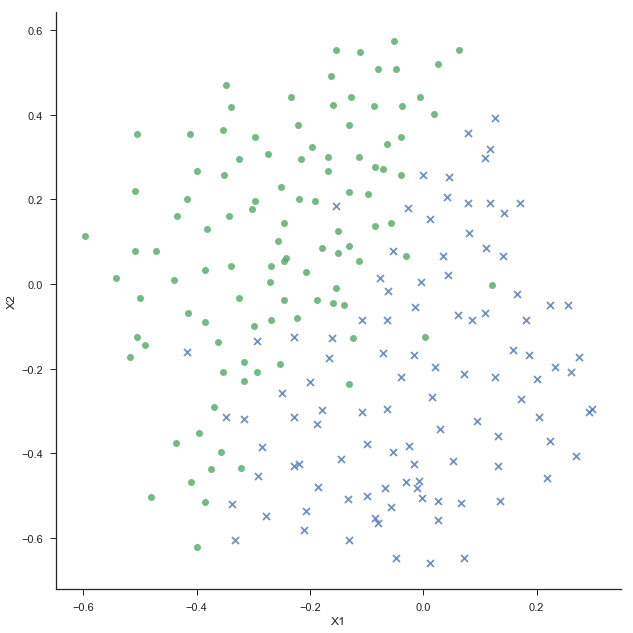

In [16]:
X = data3['X']
y = data3['y']

df = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'y': y.flatten()})

sns.lmplot(x='X1', y='X2', hue='y', markers=['x', 'o'],
                 data=df, fit_reg=False, size=9, legend=False)

[-0.7, 0.4, -0.7, 0.7]

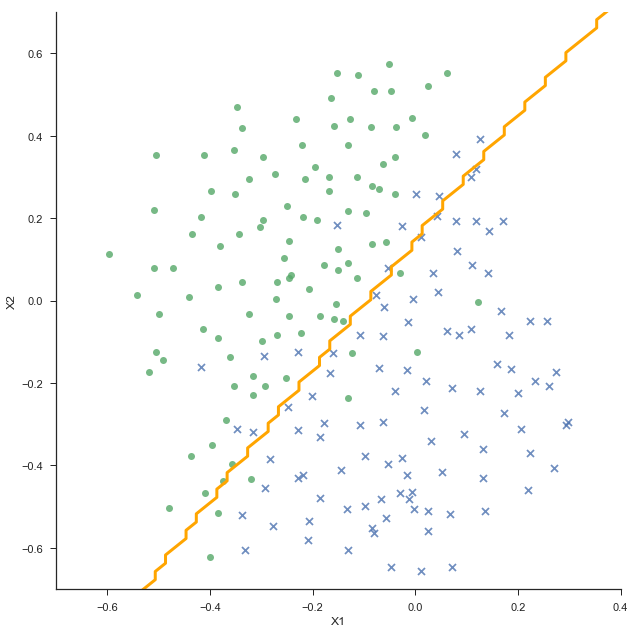

In [17]:
plt.figure()

sns.lmplot(x='X1', y='X2', hue='y', markers=['x', 'o'],
                 data=df, fit_reg=False, size=9, legend=False)



C = 1  # SVM regularization parameter
clf = SVC(kernel='rbf', C=C)
clf.fit(X, y.ravel())

h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='orange', alpha=1, linewidths=3, levels=[0.5])

# Adjusting the axes
plt.axis([-0.7, 0.4, -0.7, 0.7])

---

##  *Part II:* Spam Classification

### Preprocessing Emails

- **Lower-casing (normalizing):**
- **Stripping HTML:**
- **Normalizing URLs:**
- **Normalizing Email Addresses:**
- **Normalizing Numbers:**
- **Normalizing Dollars:**
- **Word Stemming:**
- **Removal of non-words:**

### Training SVM for Spam Classification

### Top Predictors for Spam